The aim of the study is to recognize and classify eight different gestures according to data collected from three-axis accelerometer. The gestures are shown below:

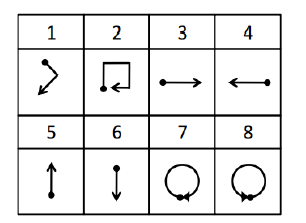

# Initialization

In [1]:
library(data.table)
library(readxl)
library(scatterplot3d) # for data visualization in 3D
#library(plot3D) # for data visualization in 3D

In [2]:
setwd("C:/Users/tirya/Desktop/IE 582/Homework 5/Github")
X_train = read_excel('uWaveGestureLibrary_X_TRAIN.xlsx', sheet=1, col_names = FALSE)
X_test = read_excel('uWaveGestureLibrary_X_TEST.xlsx', sheet=1, col_names = FALSE)
Y_train = read_excel('uWaveGestureLibrary_Y_TRAIN.xlsx', sheet=1, col_names = FALSE)
Y_test = read_excel('uWaveGestureLibrary_Y_TEST.xlsx', sheet=1, col_names = FALSE)
Z_train = read_excel('uWaveGestureLibrary_Z_TRAIN.xlsx', sheet=1, col_names = FALSE)
Z_test = read_excel('uWaveGestureLibrary_Z_TEST.xlsx', sheet=1, col_names = FALSE)
# I encountered some troubles while reading csv files. Therefore, I converted all .csv files to .xlsx files.
# There seems warning below but I can proceed without any trouble afterwards.

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems
New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ... and 311 more problems


In [3]:
#str(X_train)
#str(X_test)
#str(Y_train)
#str(Y_test)
#str(Z_train)
#str(Z_test)

# Visualization

You can see eight different examples from eight different gesture patterns. In the plots, the dark dot denotes the initial point of the movement.

In this case, I did not saw any harm to take the initial point as (0,0,0).

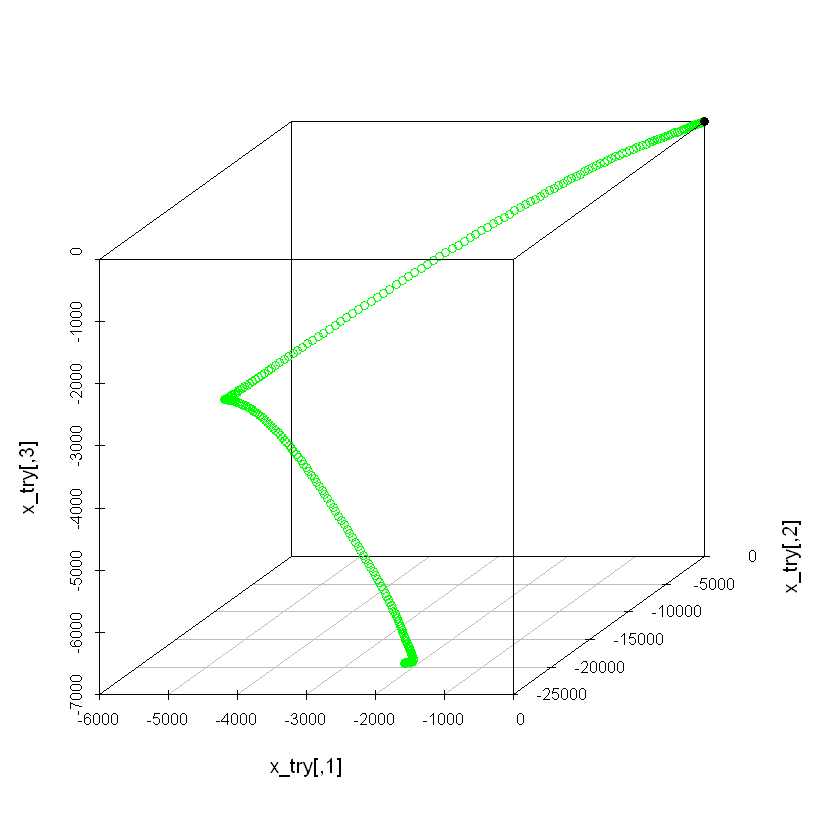

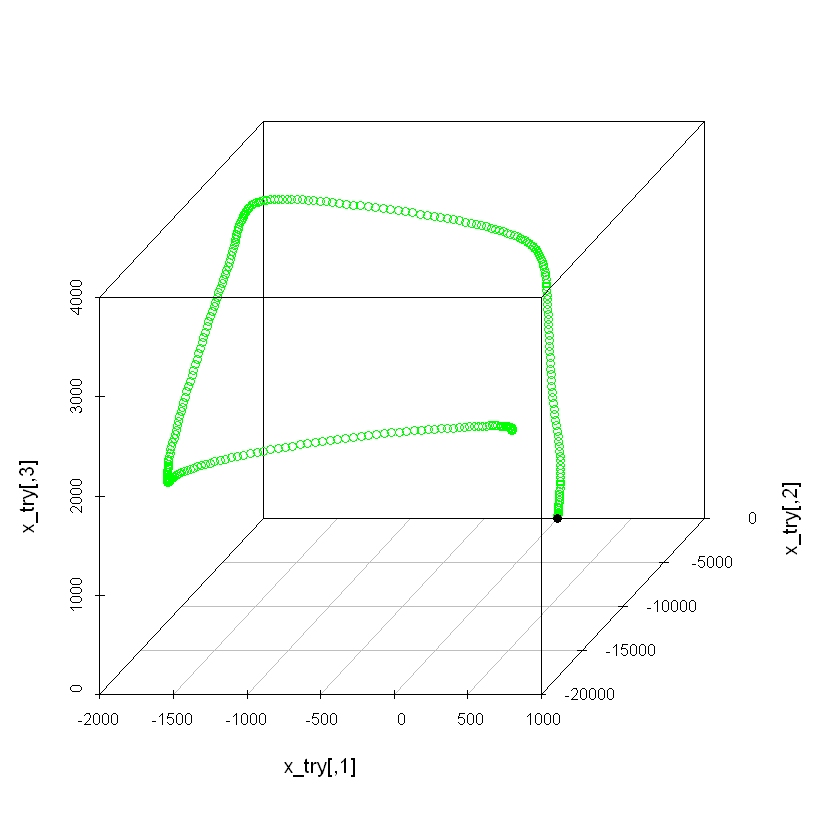

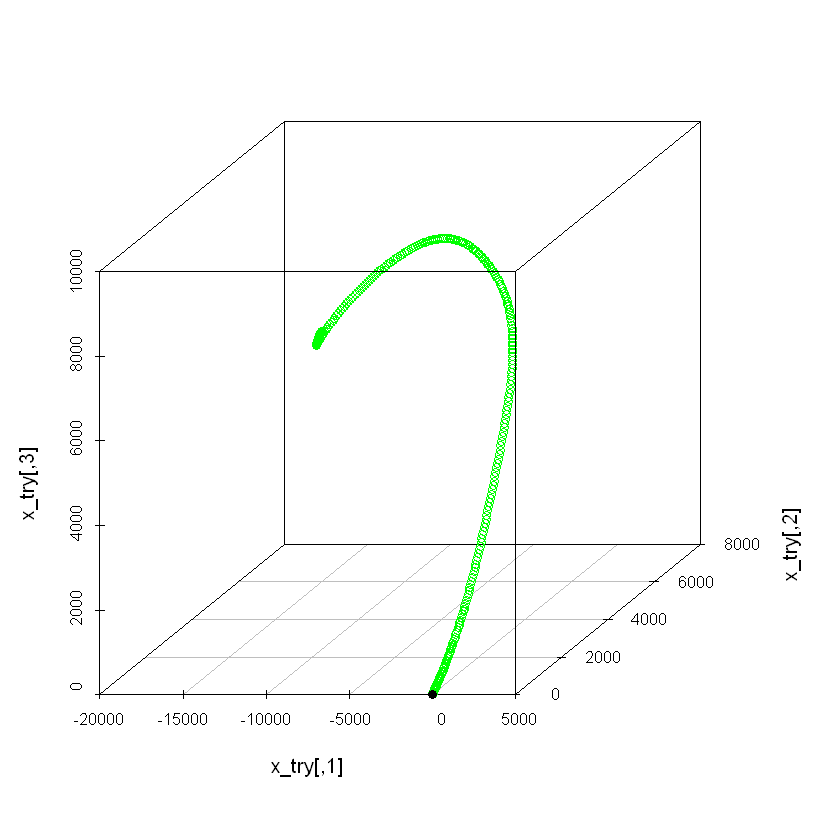

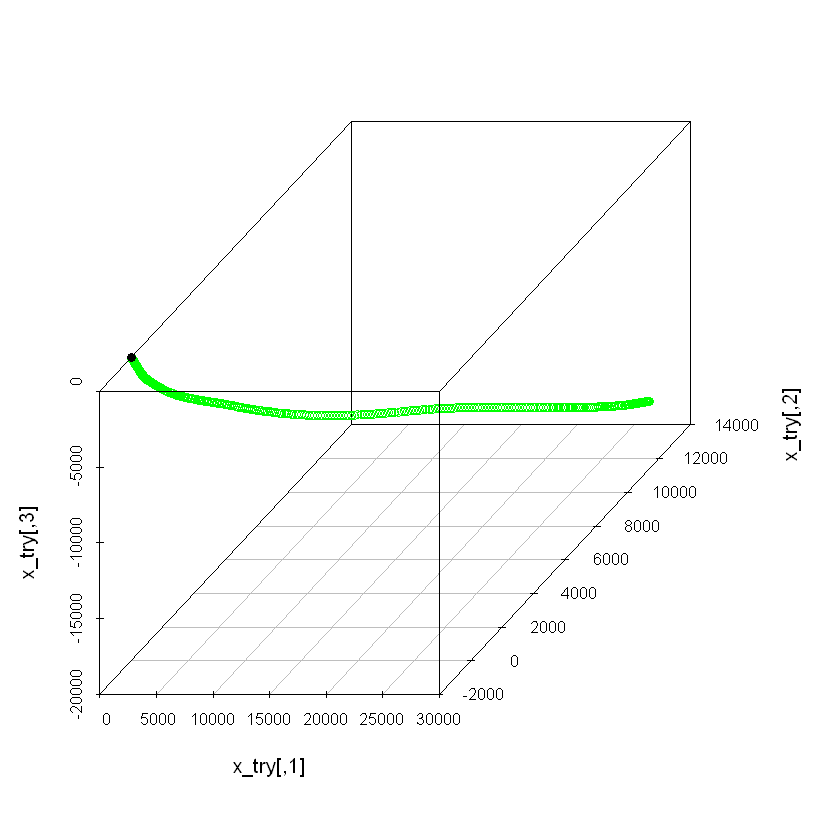

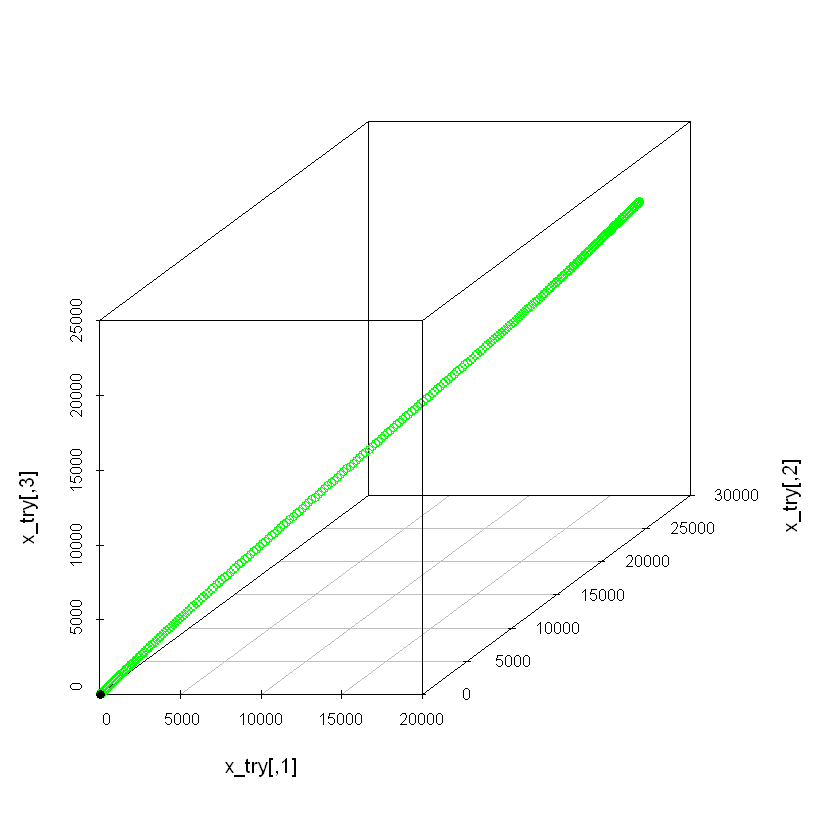

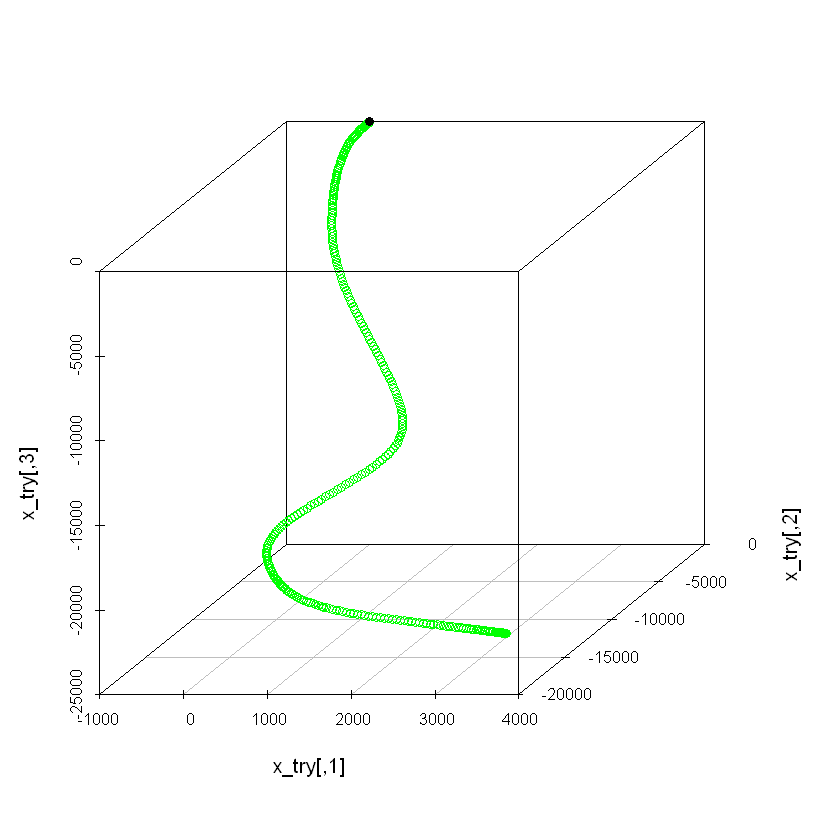

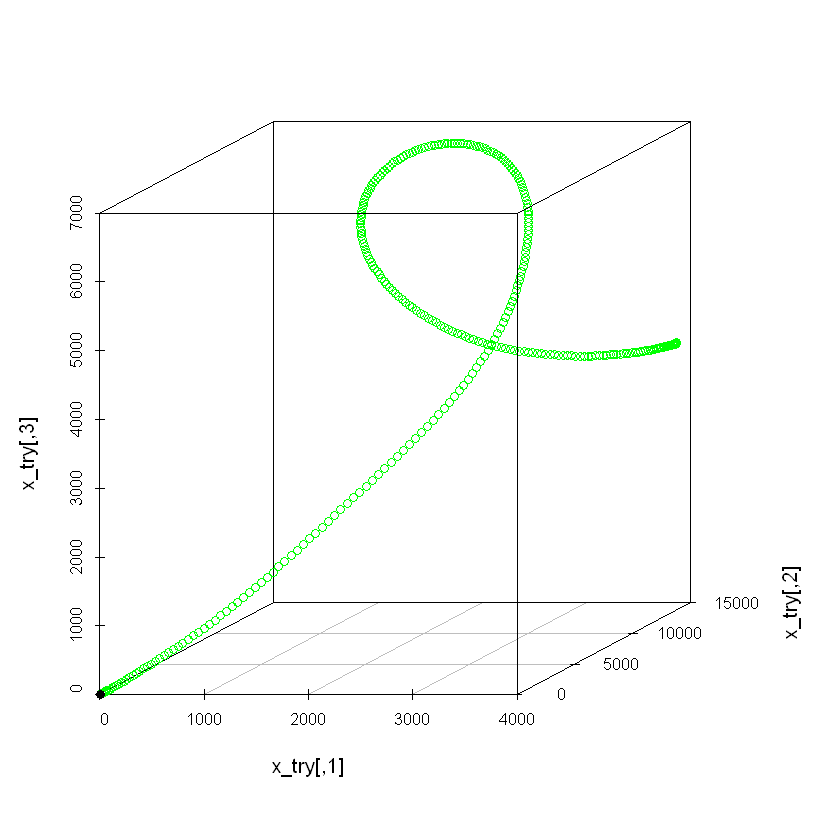

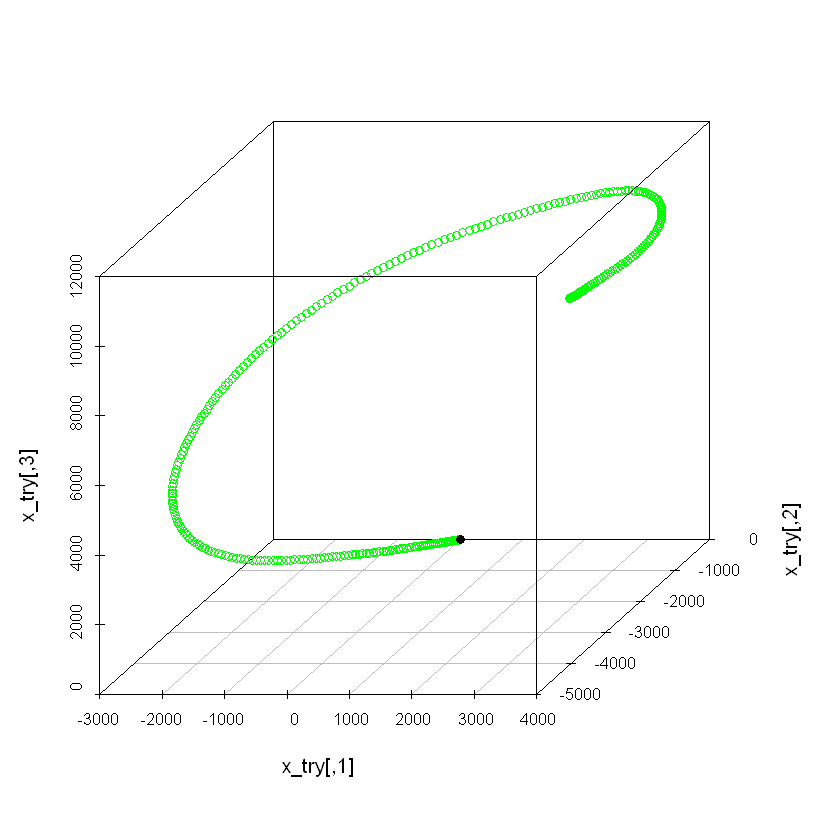

In [4]:
classes = c(11, 20, 4, 5, 2, 1, 7, 6) # the first element belongs the first class, the second belongs to second class and so on...
# acc_try = acceleration, v_try = velocity, delta_x = change of location and x_try = position

for(j in 1:8){ # one plot for each class
    n_try = classes[j]
    acc_try = t(rbind(X_train[n_try,2:length(X_train[n_try,])], Y_train[n_try,2:length(Y_train[n_try,])], Z_train[n_try,2:length(Z_train[n_try,])]))
    v_try = t(rbind(cumsum(acc_try[,1]), cumsum(acc_try[,2]), cumsum(acc_try[,3])))
    delta_x = c(acc_try[1,1]/2, acc_try[1,2]/2, acc_try[1,3]/2)
    for(i in 2:length(acc_try[,1])){
        delta_x = rbind(delta_x, c(acc_try[i,1]/2 + v_try[(i-1),1], acc_try[i,2]/2 + v_try[(i-1),2], acc_try[i,3]/2 + v_try[(i-1),3]))
    }
    x_try = cbind(cumsum(delta_x[,1]), cumsum(delta_x[,2]), cumsum(delta_x[,3]))
    scat = scatterplot3d(x_try, color = "green")
    scat$points3d(x_try[1,1], x_try[1,2], x_try[1,3], pch = 16) # to show starting point
}
# x_try is the position. It will take the XPOS, YPOS and ZPOS names in the "Prepare Data to Use" section.

Each plot above shows different gestures. However, to understand the data better, it had better draw different plots for the same gestures. Let's see if they are the similar plots or not.

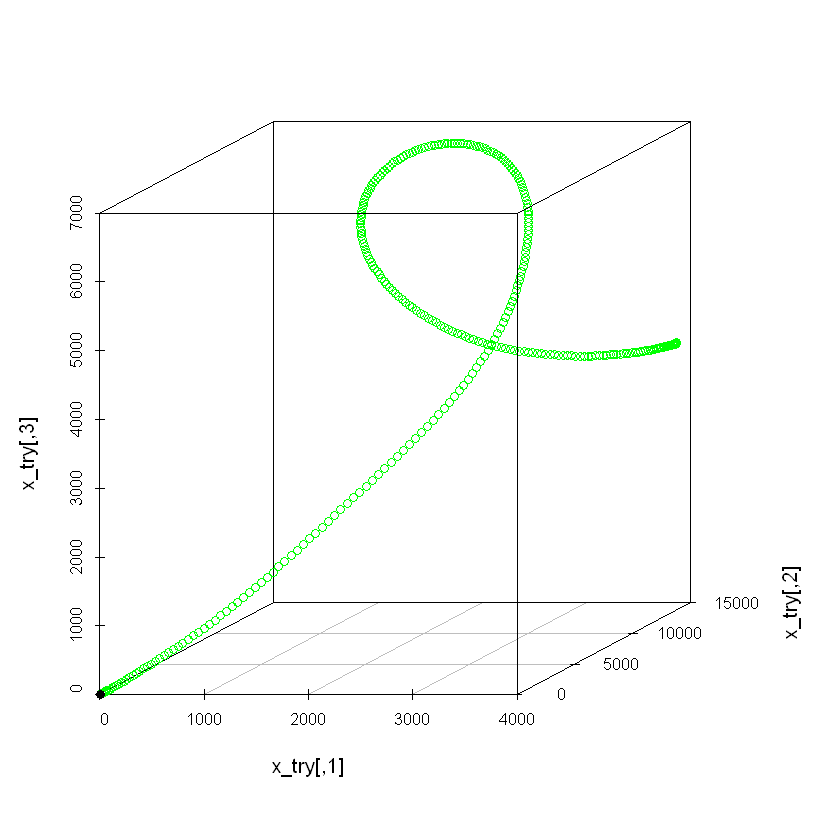

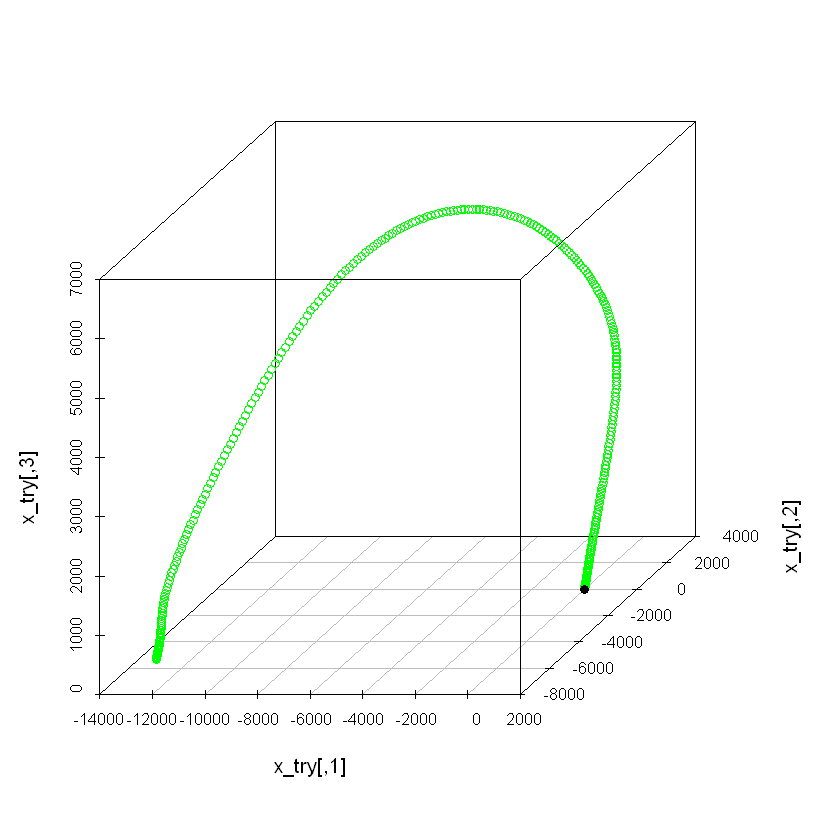

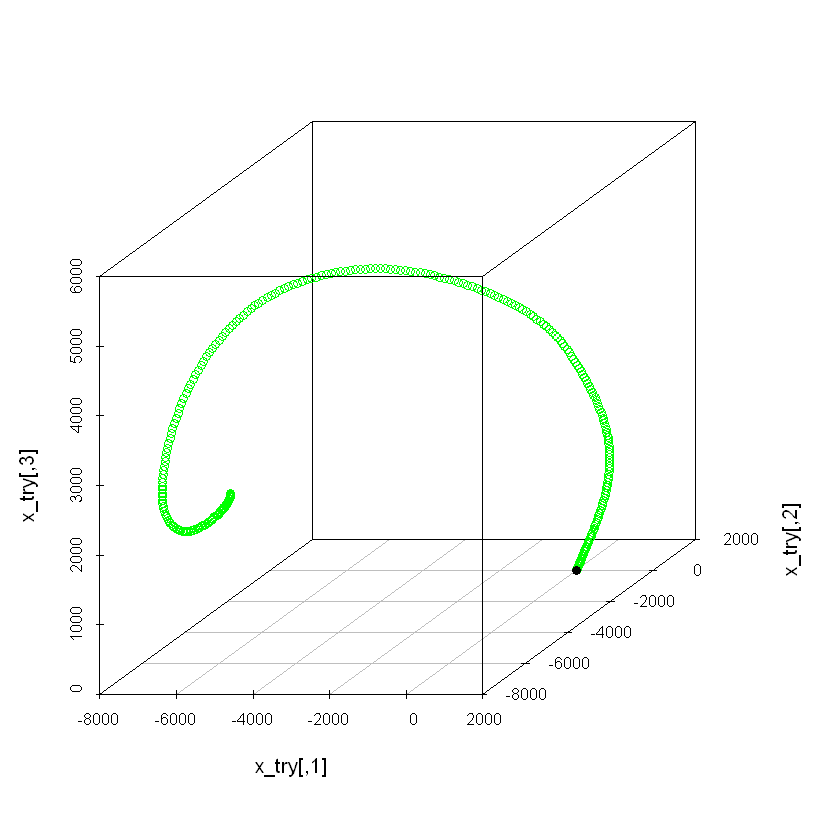

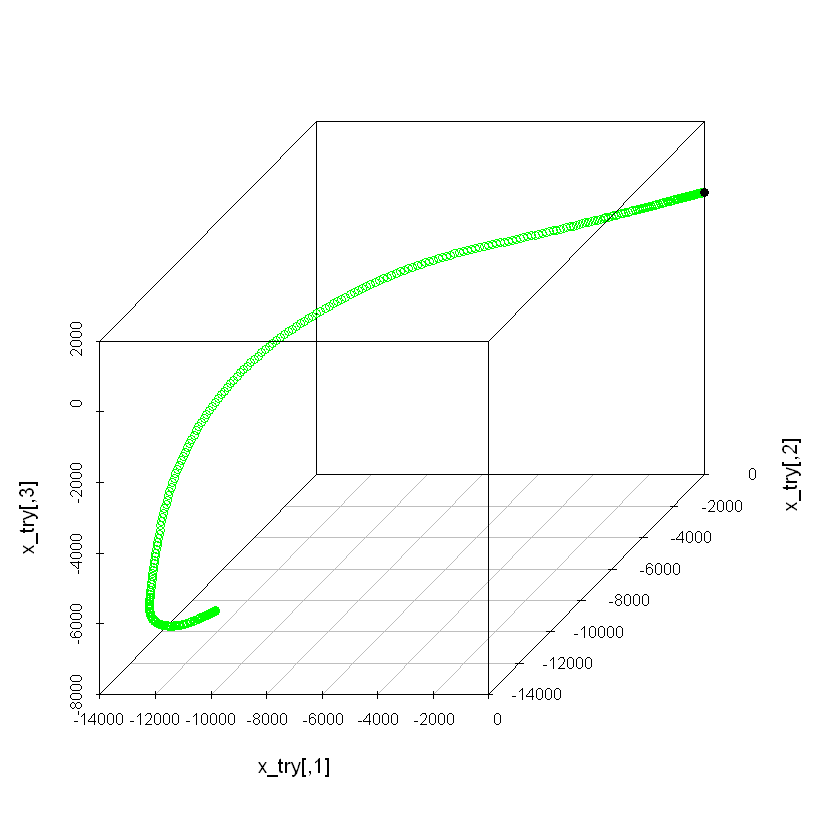

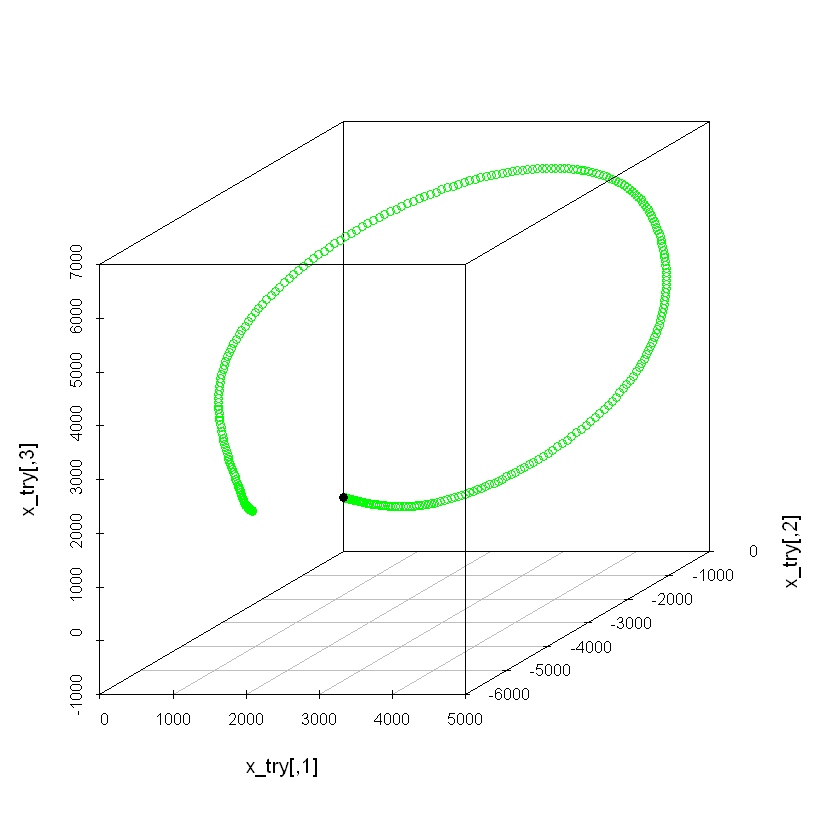

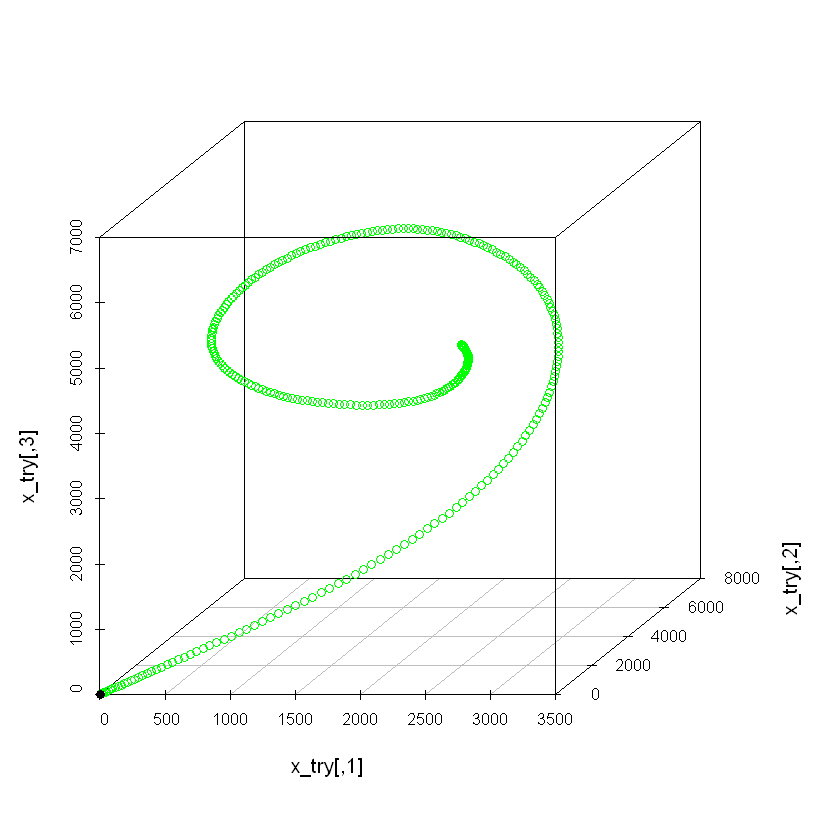

In [5]:
classes = which((X_train[1:40,1]==7)) # All instances belonging to seventh class in the first 40 observation
final_position = list()
for(j in 1:length(classes)){
    n_try = classes[j]
    acc_try = t(rbind(X_train[n_try,2:length(X_train[n_try,])], Y_train[n_try,2:length(Y_train[n_try,])], Z_train[n_try,2:length(Z_train[n_try,])]))
    v_try = t(rbind(cumsum(acc_try[,1]), cumsum(acc_try[,2]), cumsum(acc_try[,3])))
    delta_x = c(acc_try[1,1]/2, acc_try[1,2]/2, acc_try[1,3]/2)
    for(i in 2:length(acc_try[,1])){
        delta_x = rbind(delta_x, c(acc_try[i,1]/2 + v_try[(i-1),1], acc_try[i,2]/2 + v_try[(i-1),2], acc_try[i,3]/2 + v_try[(i-1),3]))
    }
    x_try = cbind(cumsum(delta_x[,1]), cumsum(delta_x[,2]), cumsum(delta_x[,3]))
    scat = scatterplot3d(x_try, color = "green")
    scat$points3d(x_try[1,1], x_try[1,2], x_try[1,3], pch = 16) # to show starting point
    final_position[[j]] = x_try[length(x_try[,1]),]
}

In [6]:
lapply(final_position,round) # It shows the final position of the six instances belonging to seventh gesture.

[[1]]
[1]  3939 14270  3845

[[2]]
[1] -12611  -6641    297

[[3]]
[1] -6560 -4448  2099

[[4]]
[1] -10988 -11931  -6548

[[5]]
[1]  1990 -5823  2338

[[6]]
[1] 1800 7025 3795

Above, we have six different plots for the seventh gesture. Some of them are similar and some are not. We can identify the shapes as 7. However, we could say those shapes that they belong to 8th gesture, too since the directions are not so clear. The user can go to any (X,Y) direction. According to her/his direction, the positions will change. You can also see the final positions of the six instances belonging to the same gesture. They all started from (0,0,0); however, the final positions are different. It will be hard to detect.

# Prepare Data to Use

In [7]:
# velocity calculations
X_train_v = rep(0, length(X_train[1,])-1)
Y_train_v = rep(0, length(Y_train[1,])-1)
Z_train_v = rep(0, length(Z_train[1,])-1)
X_test_v = rep(0, length(X_test[1,])-1)
Y_test_v = rep(0, length(Y_test[1,])-1)
Z_test_v = rep(0, length(Z_test[1,])-1)

for(i in 1:length(t(X_train[,1]))){
    X_train_v = rbind(X_train_v, cumsum(t(X_train[i,2:length(X_train[1,])])))
    Y_train_v = rbind(Y_train_v, cumsum(t(Y_train[i,2:length(Y_train[1,])])))
    Z_train_v = rbind(Z_train_v, cumsum(t(Z_train[i,2:length(Z_train[1,])])))
}
for(i in 1:length(t(X_test[,1]))){
    X_test_v = rbind(X_test_v, cumsum(t(X_test[i,2:length(X_test[1,])])))
    Y_test_v = rbind(Y_test_v, cumsum(t(Y_test[i,2:length(Y_test[1,])])))
    Z_test_v = rbind(Z_test_v, cumsum(t(Z_test[i,2:length(Z_test[1,])])))
}

X_train_v = X_train_v[-1,]
Y_train_v = Y_train_v[-1,]
Z_train_v = Z_train_v[-1,]
X_test_v = X_test_v[-1,]
Y_test_v = Y_test_v[-1,]
Z_test_v = Z_test_v[-1,]

X_train_v = cbind(X_train[,1], X_train_v)
Y_train_v = cbind(Y_train[,1], Y_train_v)
Z_train_v = cbind(Z_train[,1], Z_train_v)
X_test_v = cbind(X_test[,1], X_test_v)
Y_test_v = cbind(Y_test[,1], Y_test_v)
Z_test_v = cbind(Z_test[,1], Z_test_v)

In [8]:
delta_x_train = X_train_v
delta_y_train = Y_train_v
delta_z_train = Z_train_v
delta_x_test = X_test_v
delta_y_test = Y_test_v
delta_z_test = Z_test_v
delta_x_train[,2] = X_train[,2]/2
delta_y_train[,2] = Y_train[,2]/2
delta_z_train[,2] = Z_train[,2]/2
delta_x_test[,2] = X_test[,2]/2
delta_y_test[,2] = Y_test[,2]/2
delta_z_test[,2] = Z_test[,2]/2

for(i in 3:length(X_train[1,])){
    delta_x_train[,i] = X_train[,i]/2 + X_train_v[,(i-1)]
    delta_y_train[,i] = Y_train[,i]/2 + Y_train_v[,(i-1)]
    delta_z_train[,i] = Z_train[,i]/2 + Z_train_v[,(i-1)]
}
for(i in 3:length(X_test[1,])){
    delta_x_test[,i] = X_test[,i]/2 + X_test_v[,(i-1)]
    delta_y_test[,i] = Y_test[,i]/2 + Y_test_v[,(i-1)]
    delta_z_test[,i] = Z_test[,i]/2 + Z_test_v[,(i-1)]
}


In [49]:
XPOS_train = delta_x_train
YPOS_train = delta_y_train
ZPOS_train = delta_z_train
XPOS_test = delta_x_test
YPOS_test = delta_y_test
ZPOS_test = delta_z_test
for(i in 1:length(t(X_train[,1]))){
    XPOS_train[i,2:length(X_train[1,])] = t(cumsum(t(delta_x_train[i,2:length(X_train[1,])])))
    YPOS_train[i,2:length(Y_train[1,])] = t(cumsum(t(delta_y_train[i,2:length(Y_train[1,])])))
    ZPOS_train[i,2:length(Z_train[1,])] = t(cumsum(t(delta_z_train[i,2:length(Z_train[1,])])))
}
for(i in 1:length(t(X_test[,1]))){
    XPOS_test[i,2:length(X_test[1,])] = t(cumsum(t(delta_x_test[i,2:length(X_test[1,])])))
    YPOS_test[i,2:length(Y_test[1,])] = t(cumsum(t(delta_y_test[i,2:length(Y_test[1,])])))
    ZPOS_test[i,2:length(Z_test[1,])] = t(cumsum(t(delta_z_test[i,2:length(Z_test[1,])])))   
}

Now, we have acceleration, velocity, displacement and position for both train and test values and for all axes (X, Y and Z). For example, for train data and X axis, we have the followings:

    X_train is the acceleration 
    X_train_v is the corresponding velocity
    delta_x_train is the displacement
    XPOS_train is the position.